In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [6]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [8]:
train_labels[0]

1

In [9]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [10]:
train_data[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

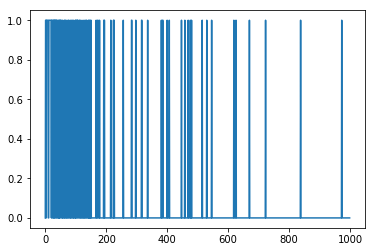

In [11]:
plt.plot(train_data[0])

In [14]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5975 - acc: 0.6853 - binary_crossentropy: 0.5975 - val_loss: 0.4519 - val_acc: 0.8033 - val_binary_crossentropy: 0.4519
Epoch 2/20
 - 1s - loss: 0.3751 - acc: 0.8440 - binary_crossentropy: 0.3751 - val_loss: 0.3475 - val_acc: 0.8523 - val_binary_crossentropy: 0.3475
Epoch 3/20
 - 1s - loss: 0.3231 - acc: 0.8659 - binary_crossentropy: 0.3231 - val_loss: 0.3321 - val_acc: 0.8590 - val_binary_crossentropy: 0.3321
Epoch 4/20
 - 1s - loss: 0.3087 - acc: 0.8727 - binary_crossentropy: 0.3087 - val_loss: 0.3333 - val_acc: 0.8586 - val_binary_crossentropy: 0.3333
Epoch 5/20
 - 1s - loss: 0.3027 - acc: 0.8757 - binary_crossentropy: 0.3027 - val_loss: 0.3272 - val_acc: 0.8593 - val_binary_crossentropy: 0.3272
Epoch 6/20
 - 1s - loss: 0.2987 - acc: 0.8778 - binary_crossentropy: 0.2987 - val_loss: 0.3301 - val_acc: 0.8596 - val_binary_crossentropy: 0.3301
Epoch 7/20
 - 1s - loss: 0.2926 - acc: 0.8796 - binary_crossentropy:

In [16]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4304 - acc: 0.7934 - binary_crossentropy: 0.4304 - val_loss: 0.3321 - val_acc: 0.8576 - val_binary_crossentropy: 0.3321
Epoch 2/20
 - 3s - loss: 0.2899 - acc: 0.8804 - binary_crossentropy: 0.2899 - val_loss: 0.3321 - val_acc: 0.8548 - val_binary_crossentropy: 0.3321
Epoch 3/20
 - 2s - loss: 0.2219 - acc: 0.9118 - binary_crossentropy: 0.2219 - val_loss: 0.3442 - val_acc: 0.8557 - val_binary_crossentropy: 0.3442
Epoch 4/20
 - 2s - loss: 0.1044 - acc: 0.9679 - binary_crossentropy: 0.1044 - val_loss: 0.4227 - val_acc: 0.8458 - val_binary_crossentropy: 0.4227
Epoch 5/20
 - 2s - loss: 0.0250 - acc: 0.9953 - binary_crossentropy: 0.0250 - val_loss: 0.5363 - val_acc: 0.8474 - val_binary_crossentropy: 0.5363
Epoch 6/20
 - 2s - loss: 0.0056 - acc: 0.9998 - binary_crossentropy: 0.0056 - val_loss: 0.6135 - val_acc: 0.8518 - val_binary_crossentropy: 0.6135
Epoch 7/20
 - 2s - loss: 0.0014 - acc: 1.0000 - binary_crossentropy:

In [18]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [19]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6791 - acc: 0.6010 - binary_crossentropy: 0.6791 - val_loss: 0.6579 - val_acc: 0.6710 - val_binary_crossentropy: 0.6579
Epoch 2/20
 - 1s - loss: 0.6241 - acc: 0.7180 - binary_crossentropy: 0.6241 - val_loss: 0.5937 - val_acc: 0.7544 - val_binary_crossentropy: 0.5937
Epoch 3/20
 - 1s - loss: 0.5633 - acc: 0.7836 - binary_crossentropy: 0.5633 - val_loss: 0.5438 - val_acc: 0.8053 - val_binary_crossentropy: 0.5438
Epoch 4/20
 - 1s - loss: 0.5205 - acc: 0.8216 - binary_crossentropy: 0.5205 - val_loss: 0.5109 - val_acc: 0.8285 - val_binary_crossentropy: 0.5109
Epoch 5/20
 - 1s - loss: 0.4904 - acc: 0.8398 - binary_crossentropy: 0.4904 - val_loss: 0.4878 - val_acc: 0.8369 - val_binary_crossentropy: 0.4878
Epoch 6/20
 - 1s - loss: 0.4685 - acc: 0.8518 - binary_crossentropy: 0.4685 - val_loss: 0.4712 - val_acc: 0.8458 - val_binary_crossentropy: 0.4712
Epoch 7/20
 - 1s - loss: 0.4515 - acc: 0.8594 - binary_crossentropy:

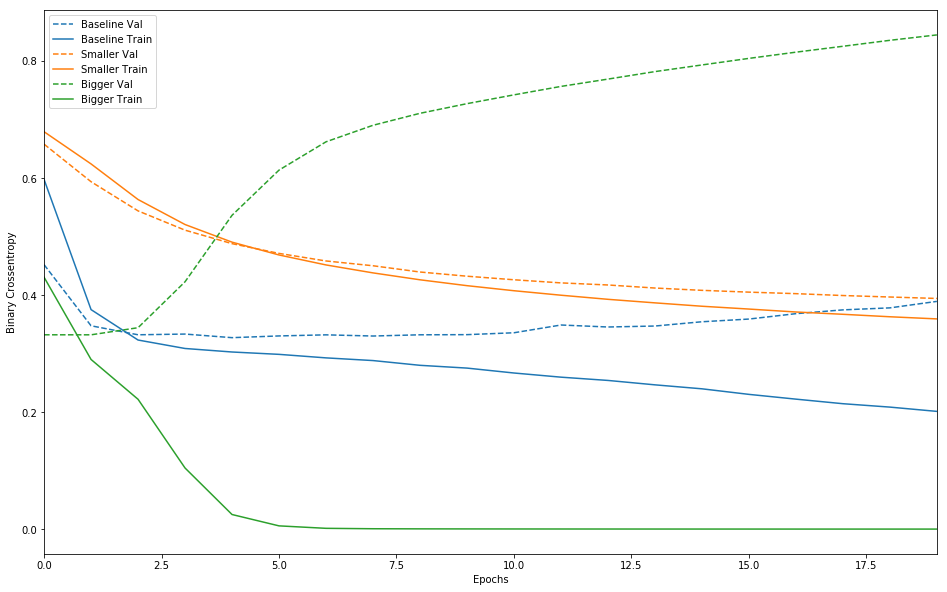

In [23]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Bigger neural network started to overfit first. (According to the  tutorial)

Definition of overfitting is not exactly defined in the tutorial but I thought document considered neural net starts to overfit when training loss go beneath validation. 

It's make sense (as far as I know) because overfitting occurs when neural net is trained to perform well only on trainig set which is not desirable. 



In [20]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6092 - acc: 0.7225 - binary_crossentropy: 0.5631 - val_loss: 0.4570 - val_acc: 0.8259 - val_binary_crossentropy: 0.4116
Epoch 2/20
 - 1s - loss: 0.4061 - acc: 0.8491 - binary_crossentropy: 0.3608 - val_loss: 0.3874 - val_acc: 0.8556 - val_binary_crossentropy: 0.3426
Epoch 3/20
 - 1s - loss: 0.3667 - acc: 0.8656 - binary_crossentropy: 0.3228 - val_loss: 0.3836 - val_acc: 0.8556 - val_binary_crossentropy: 0.3406
Epoch 4/20
 - 1s - loss: 0.3543 - acc: 0.8700 - binary_crossentropy: 0.3123 - val_loss: 0.3700 - val_acc: 0.8596 - val_binary_crossentropy: 0.3291
Epoch 5/20
 - 1s - loss: 0.3454 - acc: 0.8747 - binary_crossentropy: 0.3053 - val_loss: 0.3668 - val_acc: 0.8598 - val_binary_crossentropy: 0.3278
Epoch 6/20
 - 1s - loss: 0.3413 - acc: 0.8759 - binary_crossentropy: 0.3031 - val_loss: 0.3646 - val_acc: 0.8604 - val_binary_crossentropy: 0.3273
Epoch 7/20
 - 1s - loss: 0.3378 - acc: 0.8760 - binary_crossentropy:

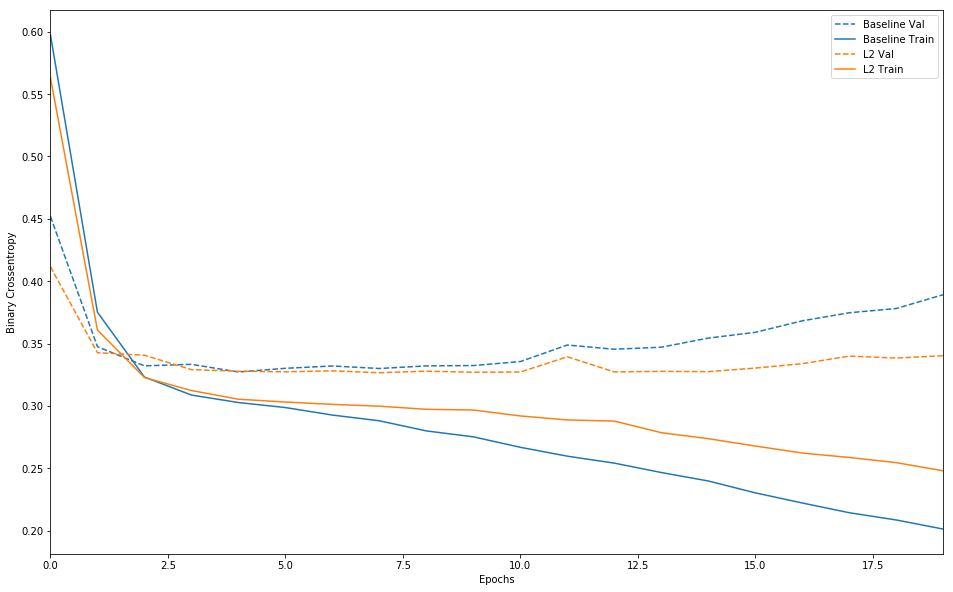

In [24]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

I could be considered that L2 model was more resistance to overfitting.
Of course, both networks went through overfitting. but L2 networks val loss is smaller. 
And L2 network's training loss is higher than baseline network.

In [25]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6827 - acc: 0.5451 - binary_crossentropy: 0.6827 - val_loss: 0.6241 - val_acc: 0.7468 - val_binary_crossentropy: 0.6241
Epoch 2/20
 - 1s - loss: 0.5972 - acc: 0.6728 - binary_crossentropy: 0.5972 - val_loss: 0.4932 - val_acc: 0.8202 - val_binary_crossentropy: 0.4932
Epoch 3/20
 - 1s - loss: 0.5157 - acc: 0.7418 - binary_crossentropy: 0.5157 - val_loss: 0.4073 - val_acc: 0.8442 - val_binary_crossentropy: 0.4073
Epoch 4/20
 - 1s - loss: 0.4621 - acc: 0.7841 - binary_crossentropy: 0.4621 - val_loss: 0.3624 - val_acc: 0.8512 - val_binary_crossentropy: 0.3624
Epoch 5/20
 - 1s - loss: 0.4286 - acc: 0.8061 - binary_crossentropy: 0.4286 - val_loss: 0.3386 - val_acc: 0.8558 - val_binary_crossentropy: 0.3386
Epoch 6/20
 - 1s - loss: 0.4018 - acc: 0.8225 - binary_crossentropy: 0.4018 - val_loss: 0.3315 - val

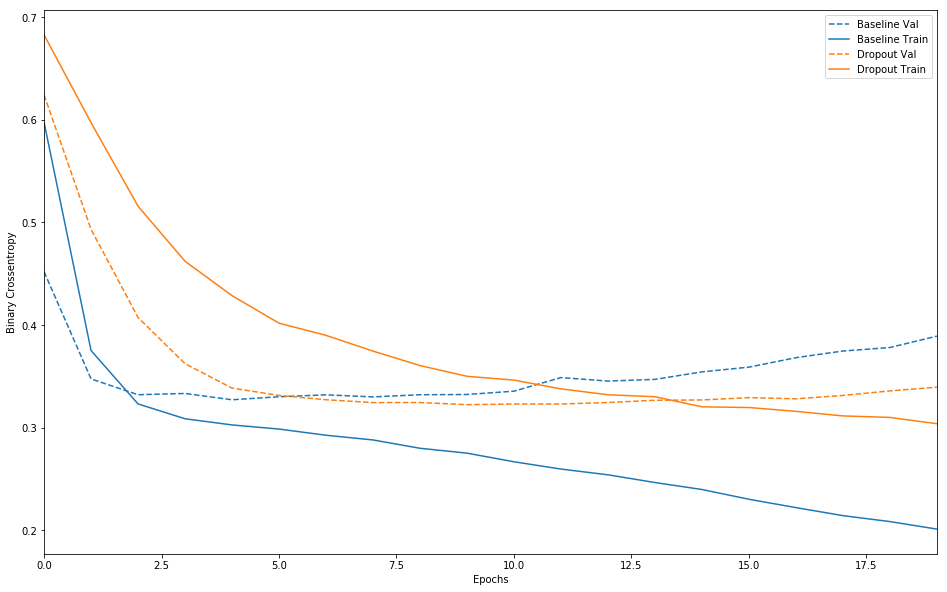

In [26]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

After inserting dropout layer, both training and validation loss are lesser lesser than previous model and overfitting occurs much later